In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import heapq

In [4]:


def simulate_queuing_network(n, p, T, lam, d):
    """
    Simulate queuing network on ER(n,p) graph.
    
    Parameters:
    - n: number of vertices
    - p: edge probability for ER(n,p) graph  
    - T: simulation time
    - lam: arrival rate (lambda)
    - d: number of choices for job placement
    
    Returns:
    - times: array of time points
    - max_loads: maximum queue length at each time point
    """
    
    print(f"Simulating ER({n}, {p}) for time {T} with λ={lam}, d={d}")
    
    # Generate ER graph
    G = nx.erdos_renyi_graph(n, p)
    
    # Convert to adjacency list
    neighbors = {}
    for i in range(n):
        neighbors[i] = list(G.neighbors(i))
    
    print(f"Graph has {G.number_of_edges()} edges, avg degree = {2*G.number_of_edges()/n:.2f}")
    
    # Initialize queues
    queues = np.zeros(n, dtype=int)
    
    # Event queue: (time, event_type, vertex)
    events = []
    current_time = 0.0
    

    times = []
    max_loads = []
    
    # Schedule first arrival
    next_arrival = np.random.exponential(1.0/lam)
    heapq.heappush(events, (next_arrival, 'arrival', -1))
    
    # Record initial state
    times.append(0.0)
    max_loads.append(0)
    
    while events and current_time < T:
        # Get next event
        event_time, event_type, vertex = heapq.heappop(events)
        current_time = event_time
        
        if current_time > T:
            break
            
        if event_type == 'arrival':
            # Choose random vertex where job arrives
            arrival_vertex = random.randint(0, n-1)
            
            # Get d candidates for job placement
            vertex_neighbors = neighbors[arrival_vertex]
            
            if len(vertex_neighbors) == 0:
                # Isolated vertex - choose d random vertices
                candidates = random.sample(range(n), min(d, n))
            elif len(vertex_neighbors) >= d:
                # Enough neighbors - sample d of them
                candidates = random.sample(vertex_neighbors, d)
            else:
                # Use all neighbors + random vertices to get d candidates
                candidates = vertex_neighbors.copy()
                remaining = [v for v in range(n) if v not in candidates and v != arrival_vertex]
                needed = d - len(candidates)
                if len(remaining) >= needed:
                    candidates.extend(random.sample(remaining, needed))
                else:
                    candidates.extend(remaining)
            
            # Find vertex with minimum queue among candidates
            min_queue = min(queues[v] for v in candidates)
            chosen_vertex = next(v for v in candidates if queues[v] == min_queue)
            
            # Add job to chosen queue
            was_empty = (queues[chosen_vertex] == 0)
            queues[chosen_vertex] += 1
            
            # If queue was empty, schedule departure
            if was_empty:
                service_time = np.random.exponential(1.0)  # service rate = 1
                departure_time = current_time + service_time
                heapq.heappush(events, (departure_time, 'departure', chosen_vertex))
            
            # Schedule next arrival
            inter_arrival = np.random.exponential(1.0/lam)
            next_arrival_time = current_time + inter_arrival
            heapq.heappush(events, (next_arrival_time, 'arrival', -1))
            
        elif event_type == 'departure':
            # Process departure
            if queues[vertex] > 0:
                queues[vertex] -= 1
                
                # If queue still has jobs, schedule next departure
                if queues[vertex] > 0:
                    service_time = np.random.exponential(1.0)
                    departure_time = current_time + service_time
                    heapq.heappush(events, (departure_time, 'departure', vertex))
        
        # Record statistics
        times.append(current_time)
        max_loads.append(np.max(queues))
    
    
    return np.array(times), np.array(max_loads)



In [23]:
def plot_max_load(times, max_loads, title=""):
    """Plot maximum load over time."""
    plt.figure(figsize=(10, 6))
    plt.plot(times, max_loads, 'o', linewidth=1.5, alpha=0.3)
    plt.xlabel('Time')
    plt.ylabel('Maximum Queue Length')
    plt.title(f'Maximum Load Over Time {title}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## Erdos ($n$, $n^{-1/5}$)

Simulating ER(10000, 0.15848931924611134) for time 1000.0 with λ=0.5, d=2
Graph has 7923821 edges, avg degree = 1584.76


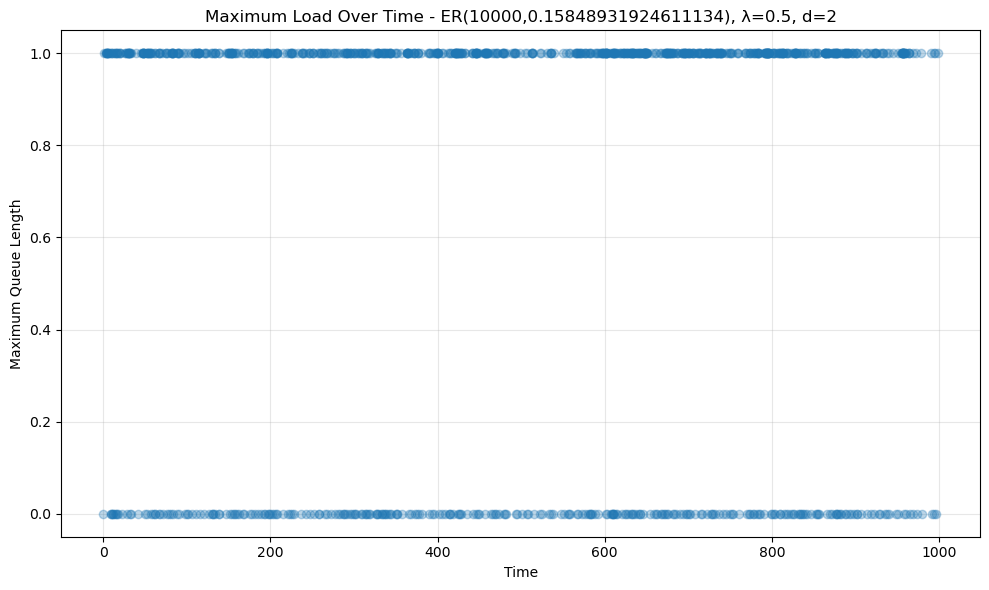

In [26]:
np.random.seed(42)
random.seed(42)
    

n = 10**4      
p = n**(-1/5)        
T = n**1/10    
lam = 0.5     
d = 2         


times, max_loads = simulate_queuing_network(n, p, T, lam, d)

plot_max_load(times, max_loads, f"- ER({n},{p}), λ={lam}, d={d}")

## Erdos ($n$, $10 \frac{\log n}{n}$)

Simulating ER(10000, 0.009210340371976185) for time 1000.0 with λ=0.5, d=2
Graph has 459186 edges, avg degree = 91.84


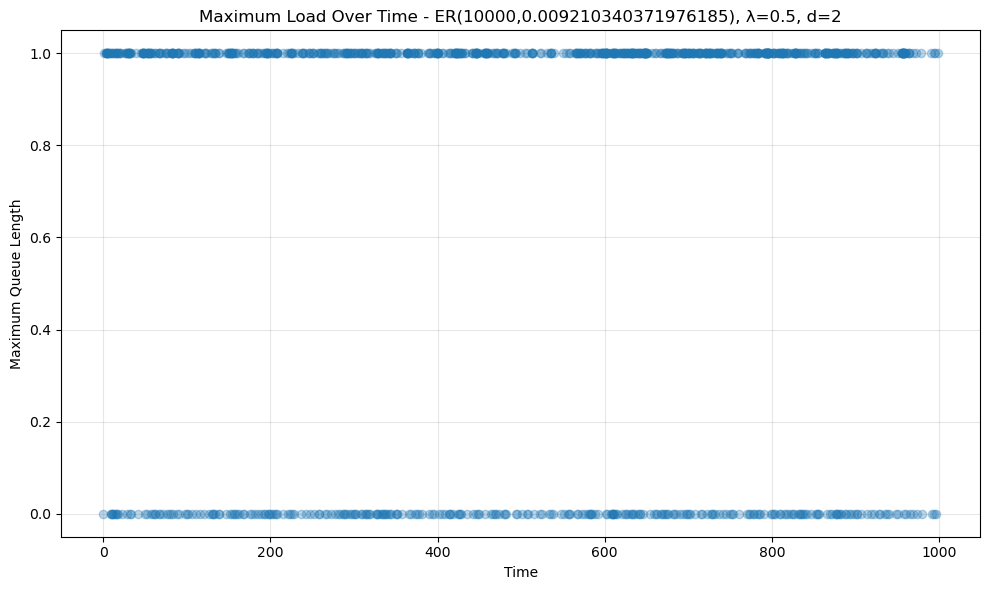

In [28]:

np.random.seed(42)
random.seed(42)

n = 10**4        
p = 10* np.log(n)/n        
T = n**1/10   
lam = 0.5     
d = 2           


times, max_loads = simulate_queuing_network(n, p, T, lam, d)

plot_max_load(times, max_loads, f"- ER({n},{p}), λ={lam}, d={d}")

## Erdos ($n$, $p$)

Simulating ER(10000, 0.5) for time 2000.0 with λ=0.5, d=2
Graph has 25003700 edges, avg degree = 5000.74


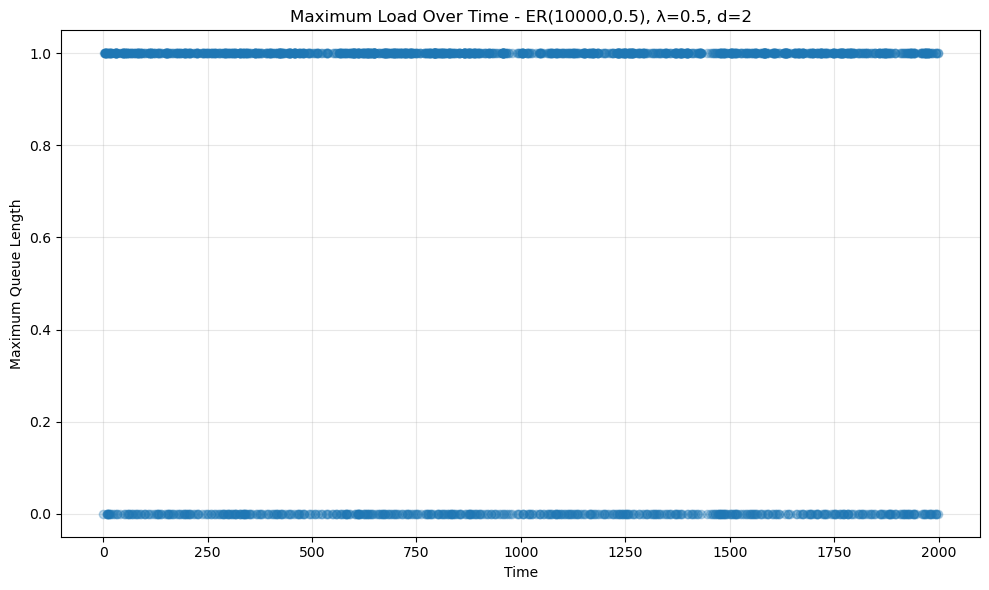

In [30]:

np.random.seed(42)
random.seed(42)
    

n = 10**4    
p = 1/2       
T = n**1/5   
lam = 0.5     
d = 2           


times, max_loads = simulate_queuing_network(n, p, T, lam, d)

plot_max_load(times, max_loads, f"- ER({n},{p}), λ={lam}, d={d}")